# Full Data Science Project - Titanic Survivals Prediction [Classification]

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning & Pre-preprocessing

#### Dealing with Missing Data

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

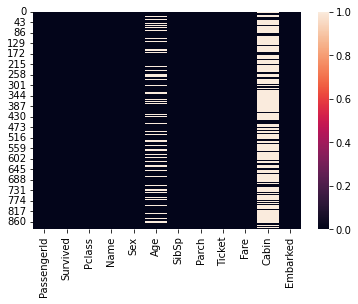

In [5]:
sns.heatmap(df.isna())

In [6]:
df["Age"]= df["Age"].fillna(df["Age"].mean())

<AxesSubplot:>

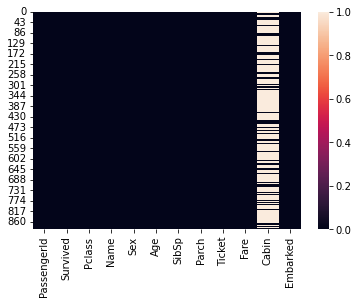

In [7]:
sns.heatmap(df.isna())

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop('Cabin', axis=1, inplace=True)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


<AxesSubplot:>

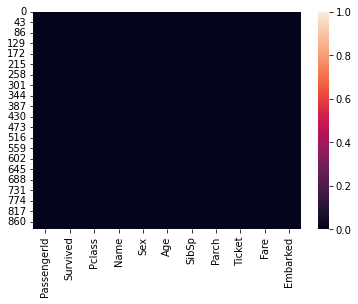

In [11]:
sns.heatmap(df.isna())

In [12]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df_Embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')

In [15]:
df = pd.concat([df, df_Embarked], axis=1)

In [16]:
df.drop('Embarked', axis=1, inplace=True)

In [17]:
df.drop(["Name"], axis = 1 ,inplace=True)

In [18]:
df.drop(['Ticket'],axis = 1 ,inplace=True)

### Exploratory Data Analysis

In [19]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.000000,1,0,7.2500,0,0,1
1,2,1,1,female,38.000000,1,0,71.2833,1,0,0
2,3,1,3,female,26.000000,0,0,7.9250,0,0,1
3,4,1,1,female,35.000000,1,0,53.1000,0,0,1
4,5,0,3,male,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0,0,1
887,888,1,1,female,19.000000,0,0,30.0000,0,0,1
888,889,0,3,female,29.699118,1,2,23.4500,0,0,1
889,890,1,1,male,26.000000,0,0,30.0000,1,0,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

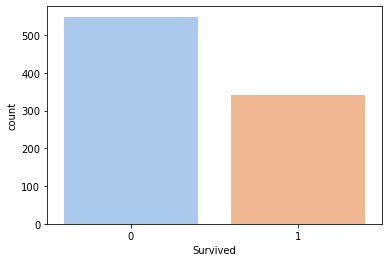

In [20]:
sns.countplot (x="Survived",data=df,palette="pastel")

<AxesSubplot:xlabel='Survived', ylabel='count'>

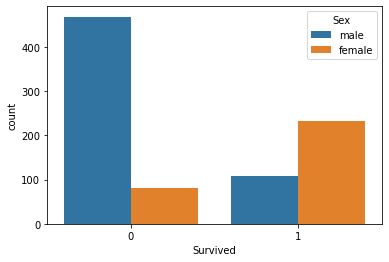

In [21]:
sns.countplot (x="Survived",data=df,hue="Sex")

<AxesSubplot:>

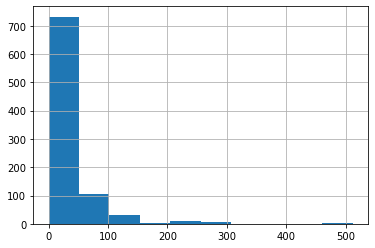

In [22]:
df["Fare"].hist()

### Build Our Model

#### Train / Test Data

In [23]:
Train_data = df

In [24]:
Test_data = pd.read_csv("test.csv")

In [25]:
Test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,NaN,Q
1,3,0,47.0,1,0,7.0000,NaN,S
2,2,1,62.0,0,0,9.6875,NaN,Q
3,3,1,27.0,0,0,8.6625,NaN,S
4,3,0,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,NaN,S
414,1,0,39.0,0,0,108.9000,C105,C
415,3,1,38.5,0,0,7.2500,NaN,S
416,3,1,NaN,0,0,8.0500,NaN,S


In [26]:
Test_data.drop('Cabin', axis=1, inplace=True)

In [27]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [28]:
Test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [29]:
Test_data["Age"]= Test_data["Age"].fillna(Test_data["Age"].mean())

In [30]:
Test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,Q
1,3,0,47.00000,1,0,7.0000,S
2,2,1,62.00000,0,0,9.6875,Q
3,3,1,27.00000,0,0,8.6625,S
4,3,0,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,S
414,1,0,39.00000,0,0,108.9000,C
415,3,1,38.50000,0,0,7.2500,S
416,3,1,30.27259,0,0,8.0500,S


In [31]:
Test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

<AxesSubplot:>

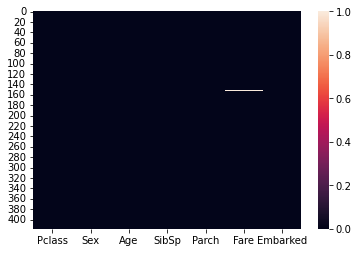

In [32]:
sns.heatmap(Test_data.isna())

In [33]:
Test_data["Fare"]= Test_data["Fare"].fillna(Test_data["Fare"].mean())

In [34]:
Test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,Q
1,3,0,47.00000,1,0,7.0000,S
2,2,1,62.00000,0,0,9.6875,Q
3,3,1,27.00000,0,0,8.6625,S
4,3,0,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,S
414,1,0,39.00000,0,0,108.9000,C
415,3,1,38.50000,0,0,7.2500,S
416,3,1,30.27259,0,0,8.0500,S


<AxesSubplot:>

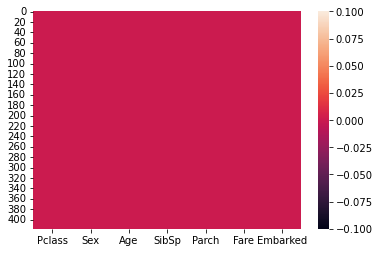

In [35]:
sns.heatmap(Test_data.isna())

In [36]:
Test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
Test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,Q
1,3,0,47.00000,1,0,7.0000,S
2,2,1,62.00000,0,0,9.6875,Q
3,3,1,27.00000,0,0,8.6625,S
4,3,0,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,S
414,1,0,39.00000,0,0,108.9000,C
415,3,1,38.50000,0,0,7.2500,S
416,3,1,30.27259,0,0,8.0500,S


In [38]:
Test_data_Embarked = pd.get_dummies(Test_data['Embarked'], prefix='Embarked')
Test_data = pd.concat([Test_data, Test_data_Embarked], axis=1)

In [39]:
Test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.50000,0,0,7.8292,Q,0,1,0
1,3,0,47.00000,1,0,7.0000,S,0,0,1
2,2,1,62.00000,0,0,9.6875,Q,0,1,0
3,3,1,27.00000,0,0,8.6625,S,0,0,1
4,3,0,22.00000,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,S,0,0,1
414,1,0,39.00000,0,0,108.9000,C,1,0,0
415,3,1,38.50000,0,0,7.2500,S,0,0,1
416,3,1,30.27259,0,0,8.0500,S,0,0,1


In [40]:
Test_data.drop('Embarked', axis=1, inplace=True)

In [41]:
Test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.50000,0,0,7.8292,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,1
2,2,1,62.00000,0,0,9.6875,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1
414,1,0,39.00000,0,0,108.9000,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,1


In [51]:
Train_data['Sex'].replace({'male': 1, 'female': 0}, inplace=True)

In [52]:
Train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


In [53]:
Test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.50000,0,0,7.8292,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,1
2,2,1,62.00000,0,0,9.6875,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1
414,1,0,39.00000,0,0,108.9000,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,1


In [54]:
from sklearn.model_selection import train_test_split
X = Train_data.drop('Survived', axis=1)
y = Train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [68]:
inputdata = Test_data

In [69]:
inputdata

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.50000,0,0,7.8292,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,1
2,2,1,62.00000,0,0,9.6875,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1
414,1,0,39.00000,0,0,108.9000,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,1


In [70]:
predictions = model.predict(inputdata)